<a href="https://colab.research.google.com/github/galrat/parsing/blob/main/!patentability_analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


6. проблема с парсингом по этому адресу: https://patents.google.com/patent/RU2805070C1/en
13. из description и ind_claims убрать знаки абзацев
14. Выходной файл сократить до 100 патентов на основании содержания искомых терминов
15. Создать файл результатов для отчета и заголовки в нем перевести на русский







# установка пакетов

In [1]:
# установка пакетов

!pip install selenium
!pip install langid
!pip install googletrans==4.0.0-rc1

from googletrans import Translator
from bs4 import BeautifulSoup
from google.colab import files
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as ec
from selenium.webdriver.support.ui import WebDriverWait
import pandas as pd
import requests
import time
import re
import langid
import pickle
from itertools import product
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.3/486.3 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=30c3521be428dadf5a6843c724fd8163477f07c9d9e98148e18e479391fda612
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.0 MB/s eta 0:00:00
   ━

# Что нужно сделать для получения таблицы с патентами:
1. ниже надо ввести номера патентов для парсинга
2. затем нажать ctrl+F9 или выбрать Runtime->Run all в меню сверху

In [102]:
theme = 'izopropil 04.01.2024'
target_country = 'US' # XX - если не надо менять



In [103]:
# original numbers for parsing

numbers = '''US-2016052846-A1
US-2543871-A
US-1944021-A
US-2081004-A
CN-100386130-C
US-2443273-A
US-9028677-B2
US-2077229-A
RU-2621675-C1
CN-101505846-B
US-2012329915-A1
US-9868893-B2
US-2826554-A
CN-101112662-A
US-10294764-B2
CA-2891278-C
US-8222455-B2
CA-3042567-C
US-7598209-B2
AU-2009343767-B2
EP-3067404-B1
US-7691260-B2
CN-101151081-B
EP-2341151-B1
EP-1877576-B1
US-8617816-B2
US-7863388-B2
US-9096805-B2
CA-2696312-C
US-9677009-B2
US-8177985-B2
PL-245670-B1
KR-101555345-B1
RU-2412958-C2
WO-2023206900-A1
US-2014096969-A1
US-2006222671-A1
JP-2023535243-A
AU-2013205049-A1
CN-101203207-B
CA-3105166-C
CN-102509786-B
US-9771437-B2
CN-106574198-A
JP-5449195-B2
CN-115151623-B
CN-109790575-A
EP-2781581-A1
EP-2738234-A1
EP-2781582-A1
EA-032827-B1
WO-2020139333-A1
US-2013109576-A1
US-10125326-B2
JP-5656638-B2
JP-5916997-B2
BR-112016014513-B1
US-10774286-B2
WO-2019055291-A1
US-2018208702-A1
BR-PI0620030-A2
IL-296206-A
CA-2936365-A1
EP-3298102-A1
CN-100571782-C
KR-20170024825-A
CN-103140267-B
CN-106574199-A
CN-103313764-A
EP-2303443-B1
CN-102869422-B
WO-2019090038-A1
WO-2017076268-A1
US-2021024883-A1
US-2022220408-A1
CN-104373065-A
CN-114624231-A
CN-115461428-B
US-2009048352-A1
US-2019376000-A1
CN-106661473-A
WO-2008065514-A2
WO-2019089724-A1
US-2083224-A
US-4001109-A
US-2022002625-A1
US-9988956-B2
BR-PI0809189-A2
CN-101287441-A
CN-101547680-A
US-10689593-B2
US-2011030961-A1
EP-3562924-A1
US-2020199473-A1
BR-PI0809188-A2
CN-106574197-A
CN-101484130-A
US-2019040335-A1
WO-2020131440-A1
KR-20160102011-A
KR-20160102008-A
KR-20160100382-A
KR-20160100383-A
WO-2020131439-A1
CN-104069494-A
JP-2023524565-A
CN-104711100-A
US-2019203144-A1
CN-104936620-A
CN-114702977-A
US-8133924-B2
RU-2510917-C2
BR-PI0619513-A2
JP-2016532740-A
US-2012298579-A1
US-2081005-A
WO-2020214789-A1
WO-2017131525-A1
JP-2013527253-A
JP-2023525096-A
JP-2014169292-A
JP-2009235411-A
KR-101904039-B1
EP-3986589-B1
US-2007249502-A1
JP-2023507987-A
EP-1707200-A1
CN-111234204-A
CN-112236465-A
CN-114644648-B
CN-208234731-U
US-2021395789-A1
KR-20230035231-A
CN-109880651-A
CN-116194548-A
US-2602067-A
CN-104693041-A
IL-298317-A
JP-6166337-B2
FR-3011464-A1
JP-2012087283-A
WO-2009115428-A1
CN-117701497-A
CN-115975611-B
JP-2011503376-A
JP-5608566-B2
US-2023027017-A1
CA-3072687-A1
US-2017066881-A1
US-2085298-A
US-5817155-A
US-2562878-A
US-4596653-A
US-5144054-A
US-2499365-A
US-4737265-A
US-5275749-A
US-7533723-B2
US-2278167-A
US-2552528-A
US-3836471-A
US-2605231-A
US-4551239-A
US-2083225-A
FR-2546765-A1
US-2077746-A
US-2363504-A
US-2085299-A
US-2034963-A
US-2110837-A
US-2023994-A
US-4342657-A
US-2309935-A
US-2300555-A
CN-116855275-A
EP-2738235-A1
US-2602066-A
AU-2015234286-A1
PL-243760-B1
US-2723241-A
US-2026195-A
US-2226118-A
US-4306981-A
RU-2117689-C1
US-2206589-A
US-2108961-A
US-2602059-A
RU-2124041-C1
US-2278838-A
US-2076623-A
US-2605232-A
US-2246856-A
US-2233383-A
US-2252110-A
US-2209445-A
US-2360853-A
US-2312732-A
US-2108960-A
US-2602052-A
US-4489194-A
US-2258892-A
US-2549435-A
US-2626928-A
US-2312734-A
US-2626905-A
US-5518517-A
EP-0391993-B1
US-2568745-A
PL-237624-B1
US-3879308-A
US-3383325-A
US-2574544-A
US-2602064-A
US-2695884-A
US-1977146-A
US-2695886-A
US-2549436-A
US-2695885-A
US-2626925-A
US-2602061-A
US-2626914-A
US-2605233-A
US-2626916-A
US-2626913-A
US-2626923-A
US-2626917-A
US-2854430-A
US-2626921-A
US-2626919-A
US-2626908-A
US-2626915-A
US-2568117-A
US-2558510-A
US-2854429-A
US-4509955-A
US-2498657-A
US-4486573-A
US-2626929-A
US-2771430-A
US-3676501-A
US-2854432-A
US-2626909-A
US-2743243-A
US-2626920-A
US-2626903-A
US-2626906-A
US-2626904-A
US-2626907-A
US-2568116-A
US-2552534-A
US-2498658-A
US-2771431-A
US-2743244-A
US-2599538-A
US-2262739-A
US-2558511-A
US-2574543-A
RU-2076135-C1
US-2743245-A
US-6361783-B2
US-2626910-A
US-2771445-A
US-4402857-A
US-2626901-A
US-2602056-A
US-2771432-A
US-2442074-A
US-2442075-A
US-2417740-A
US-2854431-A
US-2771443-A
US-2549434-A
US-2602068-A
US-2505825-A
US-2524891-A
US-2549437-A
US-2602062-A
US-2626902-A
US-2295167-A
CA-1320965-C
US-2695882-A
US-2602051-A
US-2771442-A
US-2518668-A
JP-S623123-B2
US-2499369-A
JP-2024517436-A
US-2602063-A
CA-2390824-C
US-2574545-A
US-2679485-A
US-2554667-A
US-2004060229-A1
US-3836470-A
US-2771446-A
US-2679488-A
US-2602069-A
US-2571116-A
US-2312735-A
US-2839499-A
US-2543489-A
US-2605230-A
US-2558512-A
PL-243758-B1
US-2557081-A
US-2626922-A
US-3150102-A
US-2626912-A
CN-1058150-C
US-2839503-A
JP-S623124-B2
US-2771439-A
US-2771438-A
JP-2004196964-A
US-2695915-A
US-2839502-A
US-2839504-A
US-2626924-A
US-2372256-A
US-2864788-A
US-2713559-A
US-2543223-A
US-2016186043-A1
FR-2523987-A1
US-2552529-A
US-2558513-A
US-2839500-A
US-2602058-A
US-2353697-A
US-2626926-A
US-2507560-A
US-2864789-A
US-2023104838-A1
US-2679484-A
US-2771436-A
US-2602065-A
US-2679487-A
US-2864790-A
US-2505824-A
US-2552531-A
US-2828276-A
JP-H1067624-A
US-2828277-A
GB-2061315-A
US-2429998-A
US-2920047-A
US-2771441-A
JP-5078214-B2
US-2626927-A
US-2864799-A
US-2828280-A
US-2839498-A
US-2626911-A
US-2828282-A
US-2318035-A
US-1975839-A
US-2500349-A
JP-S622563-B2
US-2023097718-A1
US-2278171-A
US-2771447-A
US-2594541-A
US-2430000-A
US-3511882-A
NO-161808-B
US-1988835-A
US-2552532-A
US-2771437-A
US-2417738-A
US-2430001-A
US-2679486-A
US-2743241-A
US-2104794-A
US-2251393-A
US-3383326-A
US-2050924-A
US-2771444-A
US-2004110877-A1
US-2429999-A
US-2568742-A
US-2262740-A
US-2552533-A
US-2743242-A
US-2552530-A
US-2615852-A
US-2771448-A
US-2106239-A
US-2602054-A
US-2792352-A
US-2839501-A
US-2695890-A
US-2372255-A
US-2695883-A
US-2262741-A
US-3838052-A
US-2854428-A
US-2602053-A
US-1985720-A
US-2568739-A
US-2602055-A
US-2695888-A
US-2828281-A
JP-2019119834-A
US-4326983-A
US-2854427-A
US-2602057-A
RU-2695732-C2
US-4316808-A
US-2766213-A
US-2290415-A
US-2262742-A
WO-8909812-A1
US-2594542-A
US-4326985-A
SU-870403-A1
US-4442014-A
JP-3585575-B2
US-4309306-A
CA-1152854-A
US-2281419-A
US-2695887-A
US-2781352-A
US-2574538-A
CA-1152852-A
US-2828283-A
US-2774741-A
NO-162567-B
US-4734204-A
US-4326968-A
MX-2008007257-A
US-2024217827-A1
US-2501015-A
CN-116199885-A
US-2568744-A
US-2050925-A
US-2540437-A
CA-1153273-A
NO-162566-B
US-3202615-A
US-4326984-A
NO-161979-B
US-2568746-A
US-2178139-A
BR-PI0414682-B1
US-2713583-A
MX-PA96006480-A
BR-PI1102029-B1
US-3084124-A
WO-2024050080-A2
US-2302121-A
US-3699051-A
US-3640894-A
CN-118980760-A
US-2255285-A
US-3106531-A
US-2574547-A
US-4343720-A
US-4248796-A
US-2568747-A
US-2262738-A
BR-102014027821-A2
US-2383130-A
US-2290413-A
US-6444852-B1
US-4566983-A
US-4471091-A
US-4596663-A
US-2492473-A
US-2388154-A
US-2292208-A
SU-457713-A1
US-2184770-A
US-3244770-A
DE-1022986-B
MX-PA95002259-A
CN-1972663-A
US-2262737-A
CN-112708483-A
CN-1688278-A
US-5041622-A
CN-117160242-A
US-4026946-A
US-2514399-A
US-2198806-A
US-2251940-A
MX-2008006073-A
US-2238927-A
US-2176896-A
US-2792390-A
CN-117186146-A
US-2303366-A
US-4206233-A
US-4187277-A
US-3836469-A
US-6555110-B1
CN-109456790-A
US-5558777-A
JP-3118060-B2
US-2238929-A
CN-118717972-A
CN-1518469-A
US-3087835-A
WO-2024118749-A1
JP-2024530706-A
US-3591520-A
TW-434026-B
CA-1152853-A
US-5637223-A
US-5364532-A
US-5853592-A
KR-20240052959-A
KR-20240037357-A
NZ-732044-A
CN-115607685-A
SU-346946-A1
US-3838050-A
US-2357935-A
CN-118206592-A
EP-3973003-A1
CN-115531250-A
US-11912933-B1
US-2679526-A
US-2574817-A
US-2552910-A
US-2290414-A
US-2023416597-A1
US-2745855-A
WO-2023240111-A1
US-5612295-A
CA-2022607-C
US-5252184-A
US-4031118-A
US-4640466-A
US-4625923-A



'''
numbers_set = list(set(map(str.strip, numbers.strip().split('\n'))))


#  код для парсинга данных по номерам патентов

## defs

In [104]:
def replace_number(original, replacements):
    # Define the priority order
    priority_order = ["CN", "EP", "US", "WO"]

    # Iterate through the priority order
    for prefix in priority_order:
        # Check if any replacement number starts with the current prefix
        for replacement in replacements:
            if replacement.startswith(prefix):
                return replacement

    # If no replacement matches, return the original number
    return original

In [105]:
def get_target_country_patent(current_patent_number, target_country, other_apps):
  new_app = current_patent_number
  number_candidates = []
  if target_country == 'XX':
    return new_app
  if target_country in other_apps:
    #print('1')
    for other_app in other_apps.split(','):
      if target_country in other_app:
        number_candidates.append(other_app)
        #print('2')
    #print('number_candidates', number_candidates)
    if len(number_candidates) > 0:
      for number_candidate in number_candidates:
        if 'B' in number_candidate[-2:] or 'C' in number_candidate[-2:] or target_country == 'WO':
          new_app = number_candidate
          break
        else:
          new_app = number_candidate
  else:
    #print('else')
    new_app = replace_number(current_patent_number, other_apps.split(','))

  return new_app

In [106]:
def get_all_claims(soup):
  claims = soup.find('div', class_='layout horizontal style-scope patent-text').text
  return claims

In [107]:
def remove_non_english_symbols(text):
  """
  Removes all non-English symbols from a text.
  """
  english_pattern = re.compile(r'[^\x00-\x7F]')
  return re.sub(english_pattern, '', text)

In [108]:
def separate_languages(text):
    sentences = text.split('.')  # You can use a more sophisticated sentence tokenizer based on your text

    english_text = []
    other_languages_text = []

    for sentence in sentences:
        # Use langid to identify the language of each sentence
        lang, confidence = langid.classify(sentence)

        if lang == 'en':
            english_text.append(sentence)
        else:
            other_languages_text.append(sentence)

    return ' '.join(english_text)

In [109]:
def get_data_from_google_patent(url, target_country):
  #try:
    options = Options()
    options.add_argument("--headless")
    options.add_argument('--no-sandbox')
    options.add_argument('--user-agent=Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36')
    driver = webdriver.Chrome(options=options)
    driver.get(url)
    WebDriverWait(driver, 20).until(ec.visibility_of_element_located((By.ID, 'content')))
    soup = BeautifulSoup(driver.page_source, 'lxml')

    # find US, EP, WO patent document
    others = soup.find('div', class_='event style-scope application-timeline')
    text = others.find_all(class_='style-scope application-timeline')[0]
    other_apps = ''
    for t in others.find_all(class_='style-scope application-timeline'):
        try:
          other_apps += t.get('data-result').split('patent/')[1].split('/')[0] + ','
        except:
          other_apps = other_apps
    #print('other_apps', other_apps)
    if other_apps == '':
      other_apps = url.split('patent/')[1].split('/')[0]

    # correct the patent number: use target country or prefered country, use patent instead application
    new_app = get_target_country_patent(url.split('patent/')[1].split('/')[0], target_country, other_apps)
    if new_app != url.split('patent/')[1].split('/')[0]:
      url = 'https://patents.google.com/patent/' + new_app + '/en'
      print('new_url (target or patent instead app)', url)
      options = Options()
      options.add_argument("--headless")
      options.add_argument('--no-sandbox')
      options.add_argument('--user-agent=Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36')
      driver = webdriver.Chrome(options=options)
      driver.get(url)
      WebDriverWait(driver, 20).until(ec.visibility_of_element_located((By.ID, 'content')))
      soup = BeautifulSoup(driver.page_source, 'lxml')
    else:
      print('url is not changed', url)

    #============================== get patent data =============================
    # title
    title = soup.find('div', id='wrapper').find('h1', id='title').text.replace('\n', '').strip()
    #print('title:', title)

    # patent_number
    patent_number = soup.find('h2', id='pubnum').text.strip().replace('\n', '').replace('\t', '')
    #print('patent_number:', patent_number)

    # applicant
    author_counter = 0
    applicant_counter = 0
    counter = 0
    author_check = 0
    applicant_check = 0
    important_people_data = soup.find('dl', class_='important-people style-scope patent-result')
    for i in important_people_data.find_all('dt', class_='style-scope patent-result'):
        if 'Inventor' in i.text:
            author_counter = counter
            author_check = 1
        if 'assignee' in i.text:
            applicant_counter = counter
            applicant_check = 1
        counter += 1
    #print('author_counter', author_counter, 'applicant_counter', applicant_counter)

    # authors
    authors = ''
    if author_check == 1:
        try:
            authors_data = soup.find('dl', class_='important-people style-scope patent-result')
            authors_data = authors_data.find_all('dt', class_='style-scope patent-result')[
                author_counter].find_next_siblings('dd')
            for author in authors_data:
                if '\n' in author.text:
                    break
                authors = authors + author.text + ';'
            authors = authors.replace('\n', '')
        except:
            #print('no authors data')
            authors = ('no authors data')
    else:
        authors = 'no_data'

    # applicants
    applicants = ''
    if applicant_check == 1:
        try:
            applicants_data = soup.find('dl', class_='important-people style-scope patent-result')
            applicants_data = applicants_data.find_all('dt', class_='style-scope patent-result')[
                applicant_counter].find_next_siblings('dd')
            for applicant in applicants_data:
                applicants = applicants + applicant.text.strip() + ';'
            applicants = applicants.replace('\n', '').strip()
        except:
            #print('no applicants data')
            applicants = ('no applicants data')
    else:
        applicants = 'no_data'
    if applicants == 'Individual;':
      applicants = authors

    # filing_date
    filind_date = 'no_data'
    publication_date = 'no_data'
    status = 'no_data'
    dates_data = soup.find_all('div', class_='event layout horizontal style-scope application-timeline')
    for data in dates_data:
        if 'filed by' in data.text:
            filind_date = data.text.split('Application')[0]
            #print('filing date:', filind_date)
        if 'Publication' in data.text:
            publication_date = data.text.split('Publication of')[0]
            #print('publication date:', publication_date)
            publication_number = data.text.split('Publication of')[1]
            #print('publication_number:', publication_number)
        if 'Status' in  data.text:
            status = data.text.split('Status')[1].replace('\n', '').replace('\t', '')
            #print('Status:', status)

    # application number
    try:
        application_number = soup.find_all('div', class_='header style-scope application-timeline')[1].text
        application_number = application_number.split('Application')[1].split('events')[0].replace(' ','')
    except:
        print('no application number data')
        application_number = 'no data'
    #print('application_number', application_number)

    # get priority applications numbers
    priority_applications = ''
    for i in soup.find('div', class_='wrap style-scope application-timeline').find_all('div', class_='event layout horizontal style-scope application-timeline'):
      try:
        priority_applications += i.text.split('Priority to')[1].strip() + ';'

        break
        #print(i.text.split('Priority to')[1].strip())
      except:
        no_priority = 1
    if priority_applications == '':
      priority_applications = 'no_data'
    #print('priority_applications', priority_applications)

    # get priority application date
    priority_application_date = 'no_data'
    for i in soup.find('div', class_='wrap style-scope application-timeline').find_all('div', class_='event layout horizontal style-scope application-timeline'):
      if 'Priority to' in i.text:
        priority_application_date = i.text.split('Priority to')[0].strip()
    #print('priority_application_date', priority_application_date)


    # ipc
    ipc_data = 'no_data'
    try:
        ipcs = soup.find('div', class_='style-scope classification-viewer').find_all('div', class_='style-scope classification-tree')
        for ipc in ipcs:
            ipc_class = ipc.find(first=True).text.strip().replace('\n', '').replace('\t', '').strip()
            #print('ipc', ipc_class)
        #print(ipc_class)
    except:
        ipc_data = 'no_data'

    ipc_datas = soup.find_all('div', class_='style-scope classification-tree')
    for i in ipc_datas[:1]:
        target = i.find_all(class_='code style-scope classification-tree')
        #print('target ipc', target[-1].text)
        # print(i.text.strip())
        ipc_data = target[-1].text.strip()

    # all claims
    claims = ''
    try:
      claims = soup.find('section', id='claims').text.strip()
      #print('claims google', claims)
    except:
      print('no claims')

    # descrition
    description = ''
    try:
      description = soup.find('section', id='description').text.strip().replace('\n\n', '\n')
      #print('descrition google', description)
    except:
      print('no description')

    # abstract
    abstract = ''
    try:
      abstract_orig = soup.find('section', id='abstract').find('span', class_='google-src-text style-scope patent-text').text#.text.replace('\n', '').replace('\t', '').replace('Abstracttranslated from ', '')
      #print('abstract_orig', abstract_orig)
      abstract_all = soup.find('section', id='abstract').text
      #print('abstract_all', abstract_all)
      abstract_eng = abstract_all.replace(abstract_orig, '').strip()
      abstract_eng = abstract_eng.replace('\n', '')
      #print('abstract_eng', abstract_eng)
      abstract = abstract_eng
    except:
      abstract = soup.find('section', id='abstract').text.replace('\n', '').replace('\t', ' ')


    # get download url
    download_url = soup.find('div', class_='flex-2 style-scope patent-result')
    if download_url:
      download_url = download_url.find('a').get('href')
      #print('download_url', download_url)
    else:
      download_url = 'no_data'

    # get cited, citing
    cited = -1
    citing = -1
    try:
      for i in soup.find('dl', class_='links style-scope patent-result').find_all('dd'):
        #print(i.text)
        if 'Patent citations' in i.text:
          citing = int(i.text.split('(')[1].split(')')[0])
          #print('citing', citing)
        if 'Cited by' in i.text:
          cited = int(i.text.split('(')[1].split(')')[0])
          #print('cited_by', cited)
    except:
      citing = -1
      cited = -1

    # get all_ind_claims
    all_ind_claims = 'test all_ind_claims'
    try:
      parent_element = soup.find('section', id="claims").find('section', id='text')
      ind_claim_1 = parent_element.find_next('div').find_next('div')
      all_ind_claims = ind_claim_1.text.strip() + '\n\n'
      for claim in ind_claim_1.find_next_siblings('div', class_='claim style-scope patent-text'):
        #print(claim.text)
        all_ind_claims = all_ind_claims + claim.text.strip() + '\n\n'
    except:
      all_ind_claims = 'no_data'

    # set 'printing = 1' to show info
    printing = 0
    if printing:
        print('patent_number:', patent_number)
        print('application_number:', application_number)
        print('title:', title)
        print('priority_applications:', priority_applications)
        print('filind_date:', filind_date)
        print('applicant:', applicants)
        print('authors:', authors)
        print('ipc_data:', ipc_data)
        print('publication_date:', publication_date)
        print('publication_number:', publication_number)
        print('abstract:', abstract)
        print('claims:', claims)
        print('status:', status)
        print('others:', other_apps)
        print('download_url', download_url)
        print('description', description)
        print('citing', citing)
        print('cited', cited)
        print('all_ind_claims', all_ind_claims)
        print()


    data_line = []
    data_line.append(patent_number)
    data_line.append(application_number)
    data_line.append(title)
    data_line.append(priority_applications)
    data_line.append(filind_date)
    data_line.append(applicants)
    data_line.append(authors)
    data_line.append(publication_date)
    data_line.append(publication_number)
    data_line.append(ipc_data)
    data_line.append(remove_non_english_symbols(claims.replace('\n', '')))
    data_line.append(status)
    data_line.append(remove_non_english_symbols(abstract.replace('\n', '')))
    #data_line.append(others[:-1])
    data_line.append(other_apps)
    data_line.append(download_url)
    data_line.append(remove_non_english_symbols(description))
    data_line.append(cited)
    data_line.append(citing)
    data_line.append(all_ind_claims)
    data_line.append(priority_application_date)

    # =========================================================================================
    # data from the bottom reagrding similar patents
    try:
      add_patents = soup.find('div', class_='footer style-scope patent-result').find_all('div', class_='responsive-table style-scope patent-result')[0].find_all('div', class_='tr style-scope patent-result')
      patent_lines = []
      for patent in add_patents:
        patent_line = []
        for line in patent.find_all('span'):
          #print(line.text.replace('*', '').strip())
          patent_line.append(line.text.replace('*', '').strip())
          #print('---------------------')
        #print(patent.find('span'))
        patent_lines.append(patent_line)
        #print('===========================')
        #break

      add_patents = soup.find('div', class_='footer style-scope patent-result').find_all('div', class_='responsive-table style-scope patent-result')[1].find_all('div', class_='tr style-scope patent-result')
      for patent in add_patents:
        patent_line = []
        for line in patent.find_all('span'):
          #print(line.text.replace('*', '').strip())
          patent_line.append(line.text.replace('*', '').strip())
          #print('---------------------')
        #print(patent.find('span'))
        if len(patent_line) == 3:
          patent_line.insert(1, 'no_data')
          patent_line.insert(3, 'no_data')
        patent_lines.append(patent_line)
        #print('===========================')
        #break

      add_patents = soup.find('div', class_='footer style-scope patent-result').find_all('div', class_='responsive-table style-scope patent-result')[2].find_all('div', class_='tr style-scope patent-result')
      for patent in add_patents:
        patent_line = []
        for line in patent.find_all('span'):
          #print(line.text.replace('*', '').strip())
          patent_line.append(line.text.replace('*', '').strip())

          #print('---------------------')
        #print(patent.find('span'))
        if len(patent_line) == 3:
          patent_line.insert(1, 'no_data')
          patent_line.insert(3, 'no_data')
        patent_lines.append(patent_line)
        #print('===========================')
        #break

      # get data for espacenet
      all_additional_urls = [url.get('href') for url in soup.find('dl', class_='links style-scope patent-result').findAll('a')]
      bottom_data = patent_lines
    except:
      bottom_data = 'no_data'
      all_additional_urls = 'no_data'
  #except:
    #print('smth wrong with url', url)
    #data_line, bottom_data, all_additional_urls = 'no_data', 'no_data', 'no_data'

    return data_line, bottom_data, all_additional_urls


In [110]:
def get_patent_data_2(number, target_country):
  """
  number: patent number for parsing in form of str
  return list of data for a patent number
  """

  if number[:2] == 'WO' and len(number) == 12:
      number = 'WO20' + number[2:]
  if number[:2] == 'EA' and len(number) == 13:
      number = 'EA' + number[-8:]

  if number[:3] == 'US2' and len(number) == 14:
      url =  number[:].replace('-', '')[:6] + '0' + number[:].replace('-', '')[6:] + '/en'
      url = 'https://patents.google.com/patent/' + url
      #print('corrected url', url)
  else:
      url = 'https://patents.google.com/patent/' + number[:].replace('-', '').replace('\n', '') + '/en'
      #print('url', url)

  # get data by url
  #print('\nstart of parsing')

  parsed_data=[]
  wrong_numbers = []
  bottom_data = []


  #print(number, 'start url', url)
  data_line_google = get_data_from_google_patent(url, target_country)

  print(data_line_google[0])
  print()
  bottom_data += data_line_google[1]
  print('bottom_data', bottom_data)

  # get espacenet url
  all_additional_urls = data_line_google[2]
  #print('all_additional_urls', all_additional_urls)


  if data_line_google[0] != 'no_data':
    print('original_number', number, 'data for writing', data_line_google[0])

  parsed_data += [[number] + data_line_google[0]]


  # create bottom data_df
  bottom_data_2 = []
  for line in bottom_data[1:]:
    if len(line) == 5 and 'Family To Family Citations' not in line[0] and 'Priority date' not in line[1]:
      bottom_data_2.append(line)
  bottom_data_df = pd.DataFrame(bottom_data_2[0:], columns=['publication number', 'Priority date', 'publication date',  'assignee',  'title'])

  return parsed_data, bottom_data_df

## code

In [111]:

# первый этап, на котором парсятся номера патентов и собираются данные из bottom part (cited, citing, similar)
header = ['original number', 'patent number', 'application_number', 'title', 'priority applications', 'filing_date', 'applicant', 'authors', 'publiction_date', 'publication_number', 'ipc', 'claims',
          'status', 'abstract', 'other_applications', 'download_url', 'description', 'cited', 'citing', 'all_ind_claims', 'priority_date']
bottom_data_file = '!system_bottom_data_step_1.csv'
file_for_saving_results = "/content/!theme.csv"
bottom_data_file = "/content/!bottom.csv"

In [112]:
columns = header

if os.path.exists(file_for_saving_results):
  processed_df = pd.read_csv(file_for_saving_results)
  processed_numbers = set(processed_df['original number'])
  print('file exists')
  bottom_df = pd.read_csv(bottom_data_file)
else:
  processed_numbers = set()
  processed_df = pd.DataFrame(columns=columns)
  bottom_df = pd.DataFrame(columns=['publication number', 'Priority date', 'publication date',  'assignee',  'title'])

  print('file not exists, creating a new file')

remaining_numbers = [num for num in numbers_set if num not in processed_numbers]
print('processed_numbers', processed_numbers)
print('remaining_numbers', remaining_numbers)
counter = 0
for patent_number in remaining_numbers:
  patent_number = patent_number.replace('-', '')
  counter += 1
  print('counter', counter, '/', len(remaining_numbers))
  try:
    print('number for parsing', patent_number)
    result = get_patent_data_2(patent_number, target_country)
    #print('result', result)
    new_row = pd.DataFrame([result[0][0]], columns=columns)
    processed_df = pd.concat([processed_df, new_row], ignore_index=True)
    processed_df.to_csv(file_for_saving_results, index=False)
    print('===============================\n')
    time.sleep(0.0)
    bottom_df = pd.concat([bottom_df, result[1]], ignore_index=True)
  except Exception as e:
    print(f"Error processing {patent_number}: {e}")
    #break

processed_df

file exists
processed_numbers {'CN-212504707-U', 'TH-122409-B', 'CN-116798662-A', 'CN-204097404-U', 'RU2575291', 'CN-102963866-A', 'RU2663312', 'CN-102965157-A', 'RU2798837', 'CN-207987121-U', 'CN-106753490-A', 'CN-115924863-A', 'CN-105217583-B', 'CN-116376603-A', 'CN-107964427-B', 'CN-105802685-A', 'KR-102498715-B1', 'RU2105241', 'CN-109967002-A', 'GB-1313931-A', 'KR-100911030-B1', 'RU182327', 'CN-104342212-A', 'CN-104804788-B', 'JP-H09170735-A', 'KR-20020019828-A', 'CN-219860574-U', 'RU-2663312-C1', 'CN-208667616-U', 'RU2518649', 'CN-101993733-B', 'RU-2367671-C1', 'CN-107723009-B', 'CN-107805510-B', 'MX-2013013661-A', 'CN-206051945-U', 'CN-113150832-A', 'CN-115321630-B', 'CN-205974373-U', 'RU-2343133-C2', 'CN-217297639-U', 'GB-1213557-A', 'CN-116023962-A', 'CN-105754625-A', 'CN-107880948-B', 'CN-110208451-B', 'CN-210945502-U', 'BR-102017026443-A2', 'CN-206279140-U', 'CN-101775309-B', 'WO-2024041663-A1', 'CN-207987104-U', 'CN-109967001-A', 'GB-1372103-A', 'CN-210030575-U', 'RU-2624202

original number patent number application_number  \
0    CN-212504707-U  CN212504707U  CN202020104193.6U   
1       TH-122409-B     TH122409B       TH601000793A   
2    CN-116798662-A  CN116798662A  CN202210281032.8A   
3    CN-204097404-U  CN204097404U  CN201420257134.7U   
4         RU2575291   RU2575291C2   RU2013125234/05A   
..              ...           ...                ...   
256    US-5792340-A    US5792340A       US08/420,376   
257  CN-116348437-A  US11453631B2       US17/495,511   
258   EP-0513051-B1   EP0513051B1        EP91902648A   
259    RU-207663-U1    RU207663U1      RU2021111714U   
260   US-8741108-B2   US8741108B2       US11/989,982   

                                                 title priority applications  \
0    High-temperature pyrolysis reactor for reducin...    CN202020104193.6U;   
1    Flame Spray Pyrolysis Reactor in Laboratory Scale               no_data   
2                      Fusion reactor hot body chamber    CN202210281032.8A;   
3    A kind of high-volatile feed coal segmentation...    CN201420257134.7U;   
4    Reactor and process for at least partial decom...               no_data   
..                                                 ...                   ...   
256  Method and apparatus for a circulating bed tra...         US08/420,376;   
257  Methods for removal HI/I2/HI3 from trifluoroac...         US17/495,511;   
258  Method and apparatus for a circulating bed tra...               no_data   
259  MOBILE PYROLYSIS REACTOR MODULE FOR WASTE THER...        RU2021111714U;   
260  Process and reactor for the pyrolysis of carbo...               no_data   

    filing_date                                          applicant  \
0    2020-01-17  Beijing Aerospace Petrochemical Technology and...   
1    2006-02-07                                            no_data   
2    2022-03-12                                               王鸿庆;   
3    2014-05-19         Henan Shunda New Energy Technology Co ltd;   
4    2011-11-01                                            no_data   
..          ...                                                ...   
256  1995-04-07                            Ensyn Technologies Inc;   
257  2021-10-06                       Honeywell International Inc;   
258  1991-01-30                            Ensyn Technologies Inc;   
259  2021-04-23                                            no_data   
260  2006-08-03                               Gecco Group Pty Ltd;   

                              authors publiction_date publication_number  ...  \
0                  张彦军;宋小飞;许杰;丁建亮;赵帆;      2021-02-09       CN212504707U  ...   
1            พานิชพันธ์ รศ.ดร.สุคนธ์;      2013-03-29          TH122409B  ...   
2                                王鸿庆;      2023-09-22       CN116798662A  ...   
3               汤广斌;潘幸辉;王恩伟;潘科;刘旭;邵杰;      2015-01-14       CN204097404U  ...   
4                      Адам ХАНДЕРЕК;      2016-02-20        RU2575291C2  ...   
..                                ...             ...                ...  ...   
256  Barry A. Freel;Robert G. Graham;      1998-08-11         US5792340A  ...   
257     Haiyou Wang;Daniel C. Merkel;      2022-09-27       US11453631B2  ...   
258  Barry A. Freel;Robert G. Graham;      1994-12-28        EP0513051B1  ...   
259       Дмитрий Витальевич Соколов;      2021-11-10         RU207663U1  ...   
260          John Lindsay Dinnematin;      2014-06-03        US8741108B2  ...   

                                                claims                 status  \
0    Claims (10)                                   ...                 Active   
1    Claims (1)                                    ...                no_data   
2    Claims (3)                                    ...                Pending   
3    Claims (3)                                    ...     Expired - Lifetime   
4    Claims (10)                                   ...                no_data   
..                                                 ...                

In [113]:
processed_df.to_csv(file_for_saving_results, index=False)


In [114]:
first_step_parsing_df = processed_df
print('количество документов на первом этапе', len(first_step_parsing_df))


количество документов на первом этапе 261


In [115]:
already_parsed = list(first_step_parsing_df['original number'].values) + list(first_step_parsing_df['patent number'].values)
print(already_parsed)
#first_step_parsing_df.to_pickle(theme + '_first_step.pickle')
#files.download(theme + '_first_step.pickle')

['CN-212504707-U', 'TH-122409-B', 'CN-116798662-A', 'CN-204097404-U', 'RU2575291', 'CN-102963866-A', 'RU2663312', 'CN-102965157-A', 'RU2798837', 'CN-207987121-U', 'CN-106753490-A', 'CN-115924863-A', 'CN-105217583-B', 'CN-116376603-A', 'CN-107964427-B', 'CN-105802685-A', 'KR-102498715-B1', 'RU2105241', 'CN-109967002-A', 'GB-1313931-A', 'KR-100911030-B1', 'RU182327', 'CN-104342212-A', 'CN-104804788-B', 'JP-H09170735-A', 'KR-20020019828-A', 'CN-219860574-U', 'RU-2663312-C1', 'CN-208667616-U', 'RU2518649', 'CN-101993733-B', 'RU-2367671-C1', 'CN-107723009-B', 'CN-107805510-B', 'MX-2013013661-A', 'CN-206051945-U', 'CN-113150832-A', 'CN-115321630-B', 'CN-205974373-U', 'RU-2343133-C2', 'CN-217297639-U', 'GB-1213557-A', 'CN-116023962-A', 'CN-105754625-A', 'CN-107880948-B', 'CN-110208451-B', 'BR-102017026443-A2', 'CN-210945502-U', 'CN-206279140-U', 'CN-101775309-B', 'WO-2024041663-A1', 'CN-207987104-U', 'CN-109967001-A', 'GB-1372103-A', 'CN-210030575-U', 'RU-2624202-C1', 'CN-101775309-A', 'CN-10

In [116]:
print(len(bottom_df))
bottom_df = bottom_df.drop_duplicates(subset=['publication number'], keep='first')
bottom_df = bottom_df.dropna()
print(len(bottom_df))

8377
5718


In [117]:
bottom_df.to_csv(bottom_data_file)

In [118]:
# убираю точки в номере патента
bottom_df = bottom_df[~bottom_df['publication number'].str.contains('.', regex=False)]
bottom_df = bottom_df[~bottom_df['publication number'].str.contains('Application', regex=False)]
bottom_df = bottom_df[~bottom_df['publication number'].str.contains('Publication', regex=False)]

In [119]:
cited_df = bottom_df.copy()

#cited_df.to_csv(theme + '_cited_first_step.csv')
#files.download((theme + '_cited_first_step.csv'))


In [120]:
# обработка bottom file

title_filter_presence = [] # this and the bottom conditions together are AND condition
title_filter_presence2 = []

title_filter_absence =  ['coal', 'diesel', 'oil', 'NOx']
number_stop_words = [' et al.'] # to delete articles and save patents

print('исходное количество bottom patents:', len(cited_df))
cited_df = cited_df[cited_df['publication number'] != 'Application']
# duplicates removing
cited_df = cited_df.drop_duplicates(['publication number'], keep='first')
cited_df = cited_df.dropna()
filtered_df = cited_df[~cited_df['publication number'].isin(already_parsed)]
print('первый этап фильтрации (drop_duplicates, dropna, drop already parsed)', len(filtered_df))

# title filtering

filtered_df = filtered_df[filtered_df['title'].str.contains('|'.join(title_filter_presence), case=False) & ~filtered_df['title'].str.contains('|'.join(title_filter_absence), case=False)]
filtered_df = filtered_df[filtered_df['title'].str.contains('|'.join(title_filter_presence2), case=False) & ~filtered_df['title'].str.contains('|'.join(title_filter_absence), case=False)]
filtered_df = filtered_df[~filtered_df['publication number'].str.contains('|'.join(number_stop_words), case=False)]
print('второй этап фильтрации (по ключевым словам в названии)', len(filtered_df))
#print(filtered_df[['publication number', 'title']])
print('отфильтрованы (исключены)', set(cited_df['publication number'].values) - set(filtered_df['publication number'].values))
print()

pattern = r'^[A-Z]{2}'
filtered_df = filtered_df[filtered_df['publication number'].str.match(pattern)]
print('общее количество документов', len(filtered_df))

#filtered_df['publication date'] = pd.to_datetime(filtered_df['publication date'])

filtered_df = filtered_df.sort_values('title', ascending=True)
for i in range(len(filtered_df)):
  print(filtered_df.iloc[i][['title']].values)

second_step_numbers = '\n'.join(filtered_df['publication number'].values)
#print('третий этап фильтрации (только целевая страна, только подходящая дата)', len(filtered_df['publication number'].values), '\n', second_step_numbers)

print('общее количество документов', len(filtered_df))

исходное количество bottom patents: 5565
первый этап фильтрации (drop_duplicates, dropna, drop already parsed) 5411
второй этап фильтрации (по ключевым словам в названии) 4321
отфильтрованы (исключены) {'CN101358136A', 'CN104910934A', 'CN208346106U', 'RU2319542C1', 'CN105567267B', 'CN108753337B', 'US10465137B2', 'CN110040936A', 'CN109420465A', 'CN105950200B', 'CN115028333A', 'US4087130A', 'GB2041396B', 'US5656239A', 'US4533438A', 'CN102559310B', 'CN102963866B', 'AU2010248073A1', 'RU153177U1', 'CN207247255U', 'CN2237727Y', 'CN103980948A', 'BR102014003116B1', 'US1457479A', 'US5759022A', 'CN207987104U', 'US4662439A', 'CN111396010B', 'CN105754624A', 'CN208104298U', 'CN104910969B', 'CN101699187A', 'CN219014327U', 'CN206051945U', 'US3233668A', 'US5792340A', 'CN105131992B', 'US3120264A', 'CN113680161A', 'CN101625117B', 'CN206279144U', 'GB156396A', 'CN105647582A', 'CN108998093A', 'CN110451754B', 'DE1931166A1', 'CN104031693A', 'CN201506772U', 'JP5458219B2', 'US3618663A', 'US2799341A', 'US201201

In [121]:
NUMBER_OF_SECOND_STEP_PATENTS = 0 # здесь можно задать, сколько взять патентов из cited, citing, similar
second_step_numbers = list(cited_df['publication number'].values)[:NUMBER_OF_SECOND_STEP_PATENTS]
second_step_for_parsing = '\n'.join(second_step_numbers)
second_step_numbers = second_step_for_parsing[:]
second_step_numbers


''

In [122]:
# второй этап, на котором парсятся данные по номерам патентов из bottom part после первого парсинга
counter = 0
if second_step_numbers:
  for patent_number in second_step_numbers.split('\n'):
    counter = counter + 1
    print('counter', counter, '/', len(second_step_numbers.split('\n')))
    #print('patent_number', patent_number)
    if patent_number in list(processed_df['original number']) or patent_number in list(processed_df['patent number']):
      print('already parsed', patent_number)
      continue
    try:
      print('number for parsing', patent_number)
      result = get_patent_data_2(patent_number, target_country)
      #print('result', result)
      new_row = pd.DataFrame([result[0][0]], columns=columns)
      processed_df = pd.concat([processed_df, new_row], ignore_index=True)
      processed_df.to_csv(file_for_saving_results, index=False)
      print('===============================\n')
      time.sleep(0.0)
      bottom_df = pd.concat([bottom_df, result[1]], ignore_index=True)
    except Exception as e:
      print(f"Error processing {patent_number}: {e}")
      #break
else:
  parsing_result_2 = [[], [], []]

In [123]:
len(processed_df)


261

In [124]:
#processed_df[processed_df.columns[:]].to_csv('/content/' + theme + '_merged_df.csv')
#files.download('/content/' + theme + '_merged_df.csv')

processed_df.to_pickle(theme + '_merged_df.pickle')
files.download(theme + '_merged_df.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# обработка спарсенных файлов

In [125]:
if 0:
  merged_df = pd.DataFrame()
  pickle_files = ['/content/TNG_1_10.12.2024_merged_df (1).pickle', '/content/TNG_1_10.12.2024_merged_df (2).pickle',
                  '/content/TNG_1_10.12.2024_merged_df.pickle']
  for file in pickle_files:
    df = pd.read_pickle(file)
    merged_df = pd.concat([merged_df, df])

  merged_df = merged_df.drop_duplicates(subset=['patent number'])

In [126]:
merged_adress = theme + '_merged_df.pickle'
#merged_adress = '/content/face_merged.pickle'


merged_df = pd.read_pickle(merged_adress)
#merged_df[merged_df.columns[:]].to_csv('/content/' + theme + '_merged_df.csv')
merged_df = merged_df.drop_duplicates(subset=['patent number'])

In [127]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 0 to 260
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   original number        256 non-null    object
 1   patent number          256 non-null    object
 2   application_number     255 non-null    object
 3   title                  256 non-null    object
 4   priority applications  256 non-null    object
 5   filing_date            256 non-null    object
 6   applicant              256 non-null    object
 7   authors                256 non-null    object
 8   publiction_date        256 non-null    object
 9   publication_number     256 non-null    object
 10  ipc                    256 non-null    object
 11  claims                 256 non-null    object
 12  status                 256 non-null    object
 13  abstract               256 non-null    object
 14  other_applications     256 non-null    object
 15  download_url           227 n

# novelty analysis


## defs

In [128]:

def match_condition(sentence, condition):
    # Split the condition into individual words
    words = condition.split(" OR ")

    # Check if any word from the condition is present in the sentence
    return any(word.lower() in sentence.lower() for word in words)

def save_sentences_with_conditions(text, conditions):
    # Tokenize the text into sentences
    sentences = re.split(r'[.!?\n]', text)

    # Initialize a list to store the sentences that meet the conditions
    result = []

    # Iterate over each sentence
    for sentence in sentences:
        # Check if the sentence meets any condition from the list of conditions
        if all(match_condition(sentence, condition) for condition in conditions):
            result.append(sentence.strip())

    return result


def get_words_from_condition(conditions):
  all_words = []

  # Iterate over each element
  for element in conditions:
      # Split the element into individual words
      words = element.split(" OR ")
      # Add the words to the list of all words
      all_words.extend(words)
  return all_words


def capitalize_words(sentence, words_list):
    # Split the sentence into words
    words = sentence.split()

    # Capitalize words from the list within the sentence
    for word in words_list:
        #print('word', word)
        for i in range(len(words)):
            if  word.lower() in words[i].lower():
                words[i] = words[i].upper()
                #print('words[i]', words[i])

    # Join the words back into a sentence
    capitalized_sentence = ' '.join(words)

    return capitalized_sentence


import re

def remove_non_english(text):
    # Regular expression to match non-English characters
    non_english_pattern = re.compile(r'[^\x00-\x7F]+')
    # Replace non-English characters with an empty string
    cleaned_text = non_english_pattern.sub('', text)
    return cleaned_text



## code

In [152]:
# форма запроса: [term_1 OR term_2, term_3 OR term_4] ищет предложения, в которых встречается два термина из четырех


conditions = [['wet grind'],
              ['wet grind', 'polymer'],
              ['wet grind', 'particle OR solid'],
              ['tube OR pipe', 'insert OR inject OR input'],
              ['polymer', 'mill OR grind'],
              ['dissipation OR solution OR dilution OR dissolution OR resolution', 'polymer'],
              ['length', 'tube OR pipe'],
              ['oil OR hydrocarbon OR liquid', 'temperature'],
              ['particle', 'size'],
              ['particle', 'size', 'length'],
              ['particle', 'size', 'temperature']
              ]

conditions = [
              ['wall OR sandwich', 'panel'],
              ['wall OR sandwich', 'panel', 'embos'],
              ['pattern OR figure OR picture', 'exploration'],
              ['pattern OR figure OR picture', 'embos'],
              ['stiffener OR rib'],
              ['embossing'],
              ['metal'],
              ['embos', 'depth'],
              ['embos', 'width']

              ]


conditions = [
              ['seismic', 'wave'],
              ['bottom', 'cable OR sensor'],
              ['seismic', 'exploration'],
              ['formation'],
              ['reflection', 'coefficient'],
              ['pressure', 'waves'],
              ['longitudinal', 'transverse'],
              ['longitudinal wave'],
              ['transverse', 'wave'],
              ['high', 'reservoir', 'pressure'],
              ['floor OR bottom OR seabed'],
              ['water OR ocean']
              ]

conditions = [
              ['batter', 'welding'],
              ['batter', 'typ'],
              ['fan', 'cool'],
              ['fan', 'ventilat'],
              ['charg', 'batter'],
              ['charg', 'controller'],
              ['charger'],
              ['welding', 'machine OR current OR electrode'],
              ['lithium', 'iron'],
              ['lithium', 'iron', 'phosphate']
              ]

conditions = [
              ['seismic', 'wave'],
              ['cable OR fiber optic sensor'],
              ['seismic', 'exploration'],
              ['longitudinal', 'transverse'],
              ['longitudinal', 'wave'],
              ['transverse', 'wave'],
              ['reflectometer OR interrogator'],
              ['reference', 'signal'],
              ['coherence']

              ]

conditions = [
              ['reactor', 'pyrolysis'],
              ['burner'],
              ['asphaltene'],
              ['paraffin'],
              ['heat', 'exchang'],
              ['gas', 'filter'],
              ['scrubber'],
              ['water', 'seal'],
              ['compact'],
              ['mobile']
              ]

In [153]:
 paragraphs = []
 for i in merged_df['description']:
  #print(i)
  paragraphs.append(i.split('.\n'))


In [154]:
merged_df['paragraphs'] = paragraphs

# удалить лишние запятые


In [155]:
processed_list = merged_df['description']
processed_list = [re.sub(r'(?<=\d)\.(?=\s[^A-Z§])', '=dot=', text) for text in processed_list]
processed_list = [re.sub(r'\bfig\.', 'fig=dot=', text, flags=re.IGNORECASE) for text in processed_list]
processed_list = [re.sub(r'\bfigs\.', 'fig=dot=', text, flags=re.IGNORECASE) for text in processed_list]
processed_list = [re.sub(r'(?<=\d)\.(?=\d)', '=dot=', text) for text in processed_list]

merged_df['description'] = processed_list

# основная обработка

In [156]:
final = []
for patent_number, title, abstract, sentenses in zip(merged_df['patent number'], merged_df['title'], merged_df['abstract'], merged_df['description']):
  final_results = []
  #print(patent_number)
  #print(sentenses)
  if sentenses == None:
    final_results = final_results + ['no_data', 'no_data', 'no_abstract']
    #print('final_results\n', final_results)
    #break
    final.append(final_results)
    continue
  #print('================================')
  for condition in conditions:
    all_words = get_words_from_condition(condition)
    #print(all_words)
    result = save_sentences_with_conditions(sentenses, condition)

    # Print the result
    final_result = ''
    for sentence in result:
        #print(capitalize_words(sentence, all_words))
        final_result += (capitalize_words(sentence, all_words)) + '\n'
    #print('final_result', final_result)
    final_results.append(remove_non_english(final_result))
  #print('--------------------')
  final_results = [patent_number, title, abstract] + final_results
  #print('final_results\n', final_results)
  #break
  final.append(final_results)
  #break


In [157]:
# заменяю =dot= на обычную точку
final_2 = []
for patents in final:
  patent_with_dots = []
  for sentences in patents:
    patent_with_dots.append(sentences.replace('=dot=', '.'))
  final_2.append(patent_with_dots)

In [158]:
final = final_2

In [159]:
df_columns = []
for condition in conditions:
  df_columns.append(' AND '.join(condition))
df_columns = ['patent number', 'title', 'abstract'] + df_columns


In [160]:
visual_df = pd.DataFrame(final, columns=df_columns)

In [161]:
visual_df = pd.DataFrame(final, columns=df_columns)
visual_df = visual_df.replace('', np.nan)
visual_df['NaN_count'] = visual_df.isna().sum(axis=1)
visual_df.drop(columns='NaN_count', inplace=True)
visual_df.head(3)


patent number                                              title  \
0  CN212504707U  High-temperature pyrolysis reactor for reducin...   
1     TH122409B  Flame Spray Pyrolysis Reactor in Laboratory Scale   
2  CN116798662A                    Fusion reactor hot body chamber   

                                            abstract  \
0  Abstract                translated from       ...   
1  Abstract                translated from Thai  ...   
2  Abstract                translated from       ...   

                               reactor AND pyrolysis  \
0  High-temperature PYROLYSIS REACTOR for reducin...   
1                                                NaN   
2  The inventor submits the patent application of...   

                                              burner asphaltene paraffin  \
0  2) The utility model discloses pyrolytic react...        NaN      NaN   
1                                                NaN        NaN      NaN   
2                                                NaN        NaN      NaN   

                                    heat AND exchang gas AND filter scrubber  \
0  When the garbage is pyrolyzed, the dust conten...            NaN      NaN   
1                                                NaN            NaN      NaN   
2                                                NaN            NaN      NaN   

  water AND seal compact mobile  
0            NaN     NaN    NaN  
1            NaN     NaN    NaN  
2            NaN     NaN    NaN

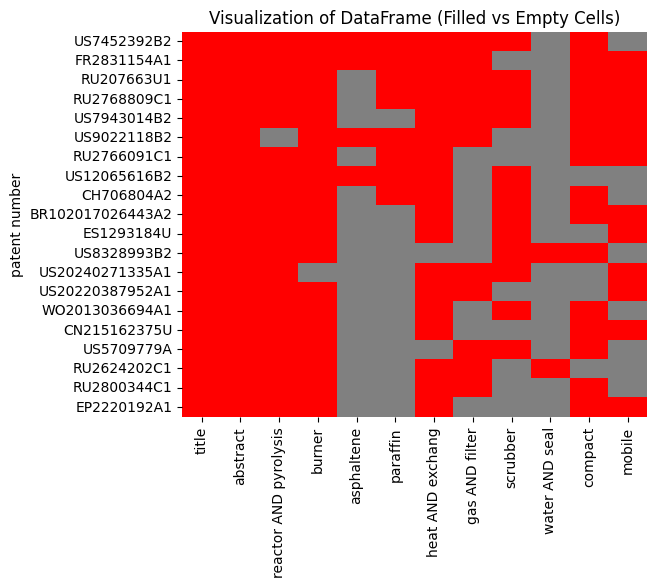

In [174]:
visual_df = visual_df.replace('', np.nan)
df = visual_df.dropna(subset=visual_df.columns[1:], how='all')
df.set_index(df.columns[0], inplace=True)
# Replace empty cells with NaN
df_nan = df.replace('', np.nan)

empty_counts = df.isnull().sum(axis=1)

# Add the empty_counts as a new column to the DataFrame
df_nan['Empty_Counts'] = empty_counts

# Sort the DataFrame by the empty counts in ascending order
df_nan = df_nan.sort_values(by='Empty_Counts')

# Drop the empty_counts column if not needed
df_nan.drop(columns='Empty_Counts', inplace=True)
df_nan = df_nan.head(20)

# Generate a heatmap with seaborn
plt.figure(figsize=(6, 0.25*len(df_nan)))
sns.heatmap(df_nan.isnull(), cmap=['red', 'grey'], cbar=False)
plt.title('Visualization of DataFrame (Filled vs Empty Cells)')
plt.show()

In [175]:
df_nan.index

Index(['US7452392B2', 'FR2831154A1', 'RU207663U1', 'RU2768809C1',
       'US7943014B2', 'US9022118B2', 'RU2766091C1', 'US12065616B2',
       'CH706804A2', 'BR102017026443A2', 'ES1293184U', 'US8328993B2',
       'US20240271335A1', 'US20220387952A1', 'WO2013036694A1', 'CN215162375U',
       'US5709779A', 'RU2624202C1', 'RU2800344C1', 'EP2220192A1'],
      dtype='object', name='patent number')

In [176]:
# подготовить файл для отчета
# Исходные данные

report_data = pd.DataFrame(columns=['Раздел', 'Данные'])

In [177]:
section_data = '''Тема
Объект исследования
Технический результат
Ключевые признаки
Слова для поиска ru
Слова для поиска eng'''.split('\n')

data = ['Фрезерный станок с числовым программным управлением',
'Фрезерный станок с числовым программным управлением',
'обеспечение надежной работы станка',
'телескопическая защита направляющих,\nзащита инструментального магазина шторкой']



In [178]:
report_data['Раздел'] = section_data


In [179]:

translator = Translator()

# Example word list (replace with your actual list)
word_list = ["hello", "world", "example", "test"]

# Translate each word to Russian
russian_translations = ''
for words in conditions:
  russian_translation = ''
  for word in words:
    try:
        translation = translator.translate(word, dest='ru')
        russian_translation += (translation.text) + ', '
    except Exception as e:
        print(f"Error translating '{word}': {e}")
        russian_translations.append(f"Error: {e}")  # Append error message
  russian_translations += russian_translation + '\n'


In [180]:
conditions_one_line = ''
for condition in conditions:
  conditions_one_line += ', '.join(condition) + '\n'


In [181]:
report_data['Данные'] = data + [russian_translations] + [conditions_one_line]


In [182]:
conditions_one_line

'reactor, pyrolysis\nburner\nasphaltene\nparaffin\nheat, exchang\ngas, filter\nscrubber\nwater, seal\ncompact\nmobile\n'

In [183]:
import pandas as pd
from openpyxl.styles import Alignment
from openpyxl.utils import get_column_letter

# Assuming 'theme', 'report_data', 'filtered_df', and 'df_nan' are already defined

with pd.ExcelWriter(theme + '_report_data.xlsx', engine='openpyxl') as writer:
    # Write report_data to the 'Исходные данные' sheet
    report_data.to_excel(writer, sheet_name='Исходные данные', index=False)

    # Write filtered_df to the 'Патенты' sheet
    merged_df[['patent number', 'title', 'filing_date', 'applicant', 'publiction_date', 'ipc', 'abstract']].to_excel(writer, sheet_name='Патенты', index=False)

    # Write df_nan to the 'Новизна' sheet
    df_nan.to_excel(writer, sheet_name='Новизна', index=True)

    # Get the workbook object and apply formatting to all sheets
    workbook = writer.book
    for sheet_name in workbook.sheetnames:
        worksheet = workbook[sheet_name]

        # Set all columns to a width of 50
        for col_idx, _ in enumerate(worksheet.columns, start=1):
            worksheet.column_dimensions[get_column_letter(col_idx)].width = 50

        # Apply text wrapping and top alignment to all cells
        for row in worksheet.iter_rows():
            for cell in row:
                cell.alignment = Alignment(wrap_text=True, vertical='top')

print(f"Report saved as {theme}_report_data.xlsx")


Report saved as compact_reacor_27.12.2024_report_data.xlsx


In [184]:
files.download(theme + '_report_data' + '.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [185]:
report_data

Раздел                                             Данные
0                   Тема  Фрезерный станок с числовым программным управл...
1    Объект исследования  Фрезерный станок с числовым программным управл...
2  Технический результат                 обеспечение надежной работы станка
3      Ключевые признаки  телескопическая защита направляющих,\nзащита и...
4    Слова для поиска ru  реактор, пиролиз, \nгорелка, \nасфальтен, \nпа...
5   Слова для поиска eng  reactor, pyrolysis\nburner\nasphaltene\nparaff...